<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/CLUSTER_KMEANS_OTRO_DE_MEDIUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# VAMOS A ENCONTRAR LOS OPTIMOS MEDIANTE EL METODO ELVOW, LA PUNTUACION DE LA SILUETA Y LAS ESTADISTICAS DE BRECHA. 
# LAS DISTANCIAS QUE PODEMOS UTILIZAR SON MUY DIVERSAS. euclidiana, manhattan, euclidiana al cuadrado, distancia del coseno. 
# kmeans lo podemos utilizar para detención de anomálias como una detención del frauid. gegmentacion de cliente, imagenes o en su caso para mineria de datos. 

In [ ]:
# vamos adelante con un ejercicio. 

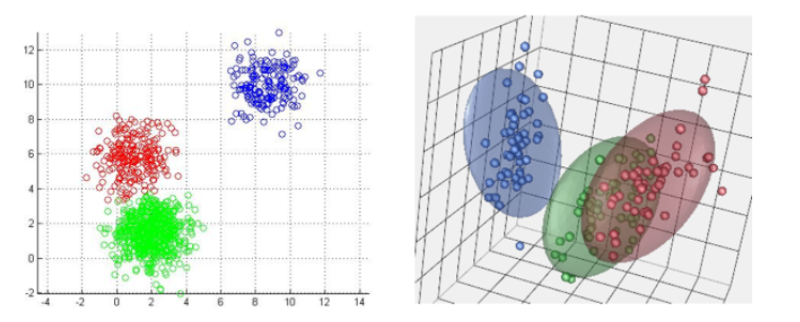

In [1]:
# IMPORTAMOS LAS LIBRERIAS QUE VAMOS A NECESITAR. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA

In [2]:
# ANTES DE LEER EL DATASET TENEMOS QUE HACER TODO EL PROCESO DE IMPORTARLO DE KAGGLE. 
!pip install kaggle update # instalamos kaggle. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir -p ~/.kaggle # creamos el provisional directorio de kaggle. 

In [4]:
! cp kaggle.json ~/.kaggle/ # llevamos el archivo al directorio creado.

In [5]:
! chmod 600 ~/.kaggle/kaggle.json # le damos permios para acceder. 

In [6]:
# importante en kaggle me tengo que poner en dataset y buscar lo que necesito. si lo encuentro tengo que poner despúes de download por ejemplo
# en este caso pone esto https://www.kaggle.com/datasets/hellbuoy/car-price-prediction y que lo que debo poner después de download es a partir de hellbuoy
#! kaggle datasets download arenagrenade/the-complete-pokemon-images-data-set
# aqui es cuando no es competición e igualmente solo tenemos que meter después del download lo siguiente “https://www.kaggle.com/arenagrenade/the-complete-pokemon-images-data-set”
# arenagrenade/the-complete-pokemon-images-data-set”
! kaggle datasets download shwetabh123/mall-customers  # en este caso en la dirección ponía lo siguiente https://www.kaggle.com/datasets/shwetabh123/mall-customers

  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 1.50MB/s]


In [10]:
# con lo de arriba ya lo tengo descargado pero está en ZIP por lo tanto tengo que hacer lo siguiente. 
# si los archivos vienen en zip se abren de la siguiente manera. 
import zipfile # importamos esta librería
datazip = zipfile.ZipFile("/content/mall-customers.zip") # esta es la dirección donde esta el zip
datazip.extract("Mall_Customers.csv","/content/" ) # tenemos que hacer esto para extraer solo uno. 
# a partir de este momento ya lo tenemos en temporal. 
# es decir ya lo tengo en temporal en google drive. ya solo tengo que leerlo 
dataset = pd.read_csv("/content/Mall_Customers.csv", index_col= "CustomerID")

In [11]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [15]:
# quitamos los duplicados. 
dataset.drop_duplicates(inplace=True)

In [16]:
# convertimos columnas categoricas de genero a one hot vector
label_binarizer = LabelBinarizer()

In [17]:
# ahora usamos el LabelBinarizeer para el genero. 
label_binarizer_output = label_binarizer.fit_transform(dataset["Genre"])

In [18]:
# añadimos las categoricas y el dataframeprincipal en uno solo
result_df = pd.DataFrame(label_binarizer_output, columns=["Gender_1"])
dataset_1 = pd.concat([dataset, result_df], axis=1, join="inner")

In [21]:
result_df.head()

,Gender_1
0,1
1,1
2,0
3,0
4,0


In [22]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [23]:
dataset_1

,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender_1
1,Male,19,15,39,1
2,Male,21,15,81,0
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0
...,...,...,...,...,...
195,Female,47,120,16,0
196,Female,35,120,79,0
197,Female,45,126,28,1
198,Male,32,126,74,1


In [19]:
# creamos la variable imput
X = dataset_1.iloc[:,[1,2,3,4]].values

In [20]:
# reducimos el la dimensión del input utilizando PCA
reduced_data = PCA(n_components=2).fit_transform

In [30]:
reduced_data

<bound method PCA.fit_transform of PCA(n_components=2)>

In [25]:
X

array([[ 19,  15,  39,   1],
       [ 21,  15,  81,   0],
       [ 20,  16,   6,   0],
       [ 23,  16,  77,   0],
       [ 31,  17,  40,   0],
       [ 22,  17,  76,   0],
       [ 35,  18,   6,   0],
       [ 23,  18,  94,   1],
       [ 64,  19,   3,   0],
       [ 30,  19,  72,   1],
       [ 67,  19,  14,   0],
       [ 35,  19,  99,   0],
       [ 58,  20,  15,   0],
       [ 24,  20,  77,   1],
       [ 37,  20,  13,   1],
       [ 22,  20,  79,   0],
       [ 35,  21,  35,   1],
       [ 20,  21,  66,   1],
       [ 52,  23,  29,   0],
       [ 35,  23,  98,   1],
       [ 35,  24,  35,   1],
       [ 25,  24,  73,   0],
       [ 46,  25,   5,   1],
       [ 31,  25,  73,   0],
       [ 54,  28,  14,   1],
       [ 29,  28,  82,   0],
       [ 45,  28,  32,   1],
       [ 35,  28,  61,   0],
       [ 40,  29,  31,   0],
       [ 23,  29,  87,   1],
       [ 60,  30,   4,   0],
       [ 21,  30,  73,   1],
       [ 53,  33,   4,   1],
       [ 18,  33,  92,   0],
       [ 49,  

# ¿ CUAL ES LA MEJOR MANERA DE ENCONTRAR CLUSTERES OPTIMOS?

- tenemos tres metodos populares.
    - el metodo del codo
    - puntuación de silueta
    - estadistica de brechas. 

In [27]:
# metodo del codo
max_k = 11 # será el máximo de clusters que van a aser evaluados. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


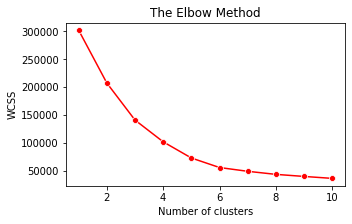

In [31]:
# Using the elbow method to find the optimal number of clusters
max_k=11 # max no. of clusters to be evaluated
wcss = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) # aqui en el articulo de medium a puesto en vez de X reduced_data, y me da un error. 
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
#plotting the data 
plt.figure(figsize=(5,3))
sns.lineplot(range(1, max_k), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# según podemos debajo el numero de cluster optimo sería 5